# Worksheet 1


The aim of this worksheet is to explore the sea surface temperature dataset and do some plots, it should help you to become more comfortable working with netcdf files and plotting with cartopy and matplotlib.


The sst dataset comes from the Met Office and contains observationsal data, further info can be found here: https://www.metoffice.gov.uk/hadobs/hadisst/. You'll need to download the file at the bottom of the page called 'HadISST_sst.nc.gz (~212Mb)', save it in the same folder as this notebook.

Before you begin you will need to install some Python packages: netCDF4 and cartopy. You can do this through Anaconda or by opening the terminal on your PC and typing two lines of code:
conda install netCDF4 &
conda install -c conda-forge cartopy.

There's almost always an issue installing new packages but hopefully with Conda you should be fine!


In [38]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset,num2date, date2num
from datetime import date, timedelta

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300 # makes the figures bigger

In [8]:
sst_file = Dataset('HadISST_sst.nc')
variables = sst_file.variables
print(sst_file.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: days since 1870-1-1 0:0:0
    calendar: gregorian
    long_name: Time
    standard_name: time
unlimited dimensions: time
current shape = (1810,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float32 time_bnds(time, nv)
unlimited dimensions: time
current shape = (1810, 2)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: Longitude
    standard_name: longitude
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used, 's

### 2. Open the file and assign names to each of the variables you want to use (sst,latitude,longitude,time).
Print out some of the variables, what shape are they in? What units do they have?

Hint: try this method if you get stuck https://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/ and don't forget to mask the fill values - these represent missing datapoints.


In [19]:
# lats_joe = sst_file.variables['latitude'][:] # Joe method 
lats_np = np.array(sst_file.variables['latitude']) # numpy method
lons_np = np.array(sst_file.variables['longitude'])
time = np.array(sst_file.variables['time'])
sst = np.array(sst_file.variables['sst'])

In [31]:
sst = np.ma.masked_values(sst,-1e+30) # fill values, as listed above
sst = np.ma.masked_values(sst,-1000.00)
sst.shape

(1810, 180, 360)

### 3. Plot global temperature anomaly

Hint: https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html

Hint: first find the indices which correspond to the correct dates, then take a slice of the data. After that you want to take the mean accross the sst axis to get the mean temp at each of the grid points!

In [33]:
time_units = sst_file.variables['time'].units
time_convert = num2date(time, time_units)

In [64]:
from datetime import datetime
start = datetime.strptime('01-01-1950',"%d-%m-%Y")
end = datetime.strptime('31-12-1980',"%d-%m-%Y")

In [68]:
# Trying to get this into a comparable format, but seems like numpy and netCDF just have different formats

In [69]:
# calulate baseline average for each grid point (01-01-1950 to 31-12-1980)
# thought - this will generate a grid of 180 by 360
# so do we need to loop through all of these 180*360 calculations? 
# probably easier to do some kind of slice
sst_avg = sum(sst[1:1804,:,:])/1805

In [70]:
sst_avg.shape

(180, 360)

In [168]:
time.shape

(1805,)

In [71]:
# calulate baseline average for each grid point (01-01-1950 to 31-12-1980)
# this must be a slice for a particular range, and the number of months is 31*12 = 372
# time range is defined as days since 1-1-1870
bas_start = (1950-1870)*12
bas_end = (1981-1870)*12
print(bas_start)
print(bas_end)

960
1332


In [72]:
1332-960

372

In [73]:
bs_avg = sum(sst[960:1320,:,:])/372
print(bs_avg)
# ----------------------------------
# do the average with np.mean() as this automatically works our the number of values over the axis
# 372 could be incorrect or would change if you need to use a higher resolution file
bs_avg = np.mean(sst[906:1320,:,:],axis=0)
print(bs_avg)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
[[-1.8000011444091797 -1.8000017562002506 -1.8000017562002506 ...
  -1.8000011444091797 -1.8000011444091797 -1.8000011444091797]
 [-1.8000018941945044 -1.8000018941945044 -1.8000018941945044 ...
  -1.8000017976107663 -1.8000018941945044 -1.8000018941945044]
 [-1.799997259069372 -1.7999989660711235 -1.7999991522894965 ...
  -1.799997259069372 -1.7999990895308184 -1.7999973030977472]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


In [74]:
# current period
cur_start = (2000-1870)*12
cur_end = (2019-1870)*12
cur_dur = cur_end - cur_start
print(cur_start)
print(cur_end)
print(cur_dur)

1560
1788
228


In [75]:
cur_avg = sum(sst[1560:1788,:,:])/228

# -----------------------------------
# current
i_2000 = 1560
i_2019 = 1799
cur_avg = np.mean(sst[i_2000:i_2019,:,:],axis=0)

In [76]:
diff = bs_avg - cur_avg

# ---------------------
diff = cur_avg - bs_avg # this way round as if the current > baseline that indicates a temperature increase

In [77]:
diff.shape # looking at the size of the new array

(180, 360)

In [78]:
diff

masked_array(
  data=[[0.0008933674205433562, -5.835844874013674e-08,
         0.0009430997654955586, ..., 0.0009028336097454126,
         0.0008870486555427881, 0.0008767335311226088],
        [-2.261205556131074e-08, -2.261205556131074e-08,
         6.2426372959834e-09, ..., -1.0973786657153539e-07,
         -4.1066547495915984e-08, -3.1914934695009833e-08],
        [-3.7253686320237733e-06, -2.2787248263878013e-06,
         -2.363348611700289e-06, ..., -3.9857265778930895e-06,
         -2.155265131476014e-06, -4.3052610998461915e-06],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  Tru

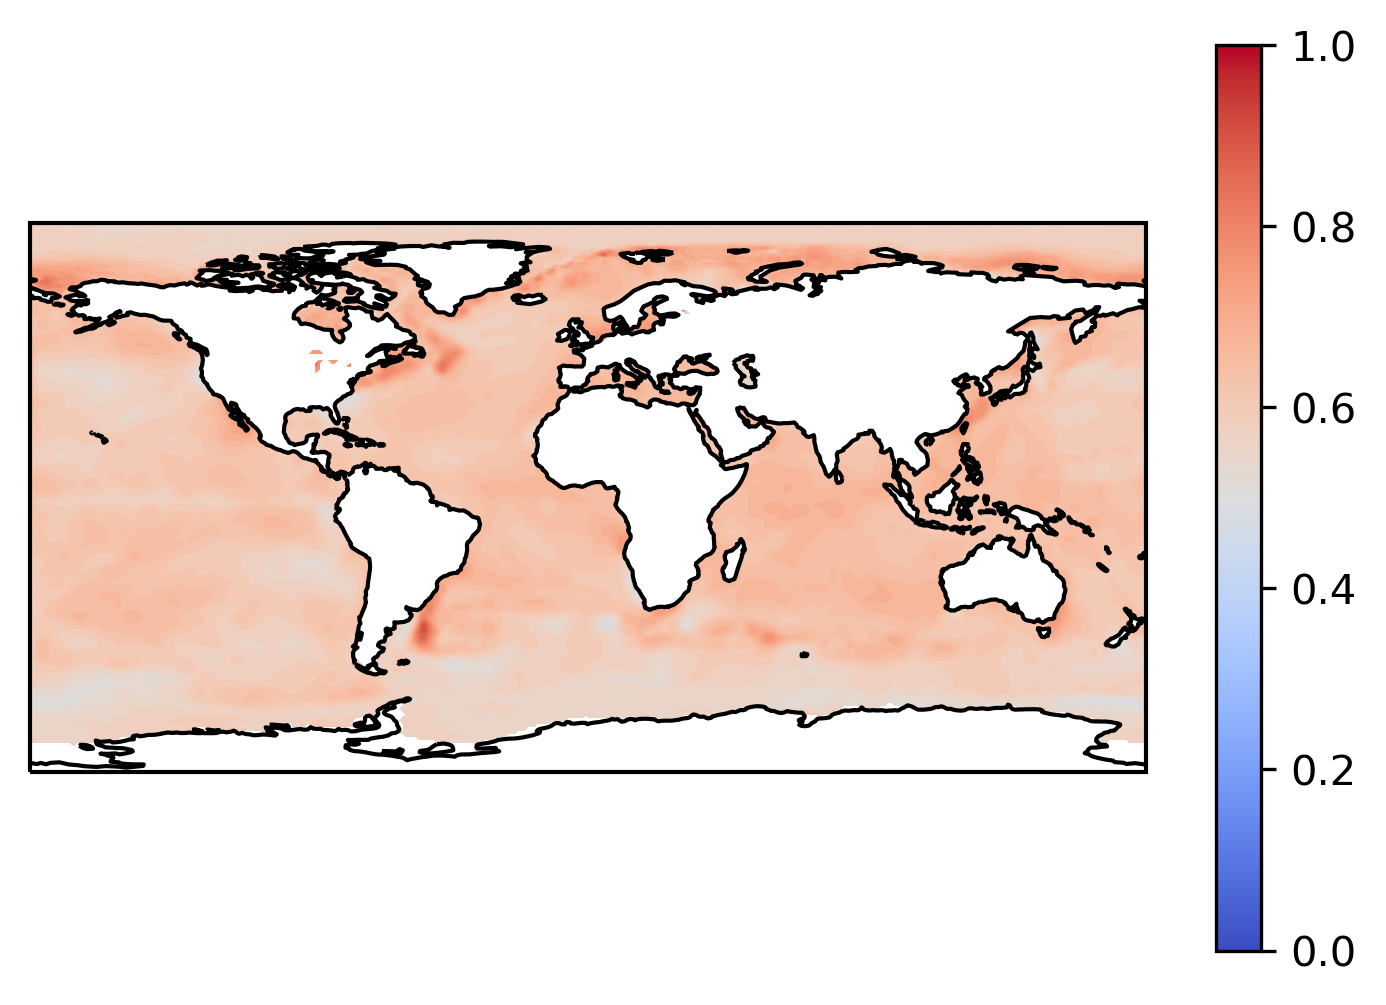

In [79]:
imgplot = plt.imshow(diff)

# ------------------------
plt.clf()
#  plot the sst anomaly timeseries

# use matplotlib to define the axes and cartopy to define the map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add the contour layer to the axes, the points will need to be tranformed to the map projection
ax.contourf(lons_np, lats_np, diff, 60, transform=ccrs.PlateCarree(),cmap='coolwarm')
ax.coastlines()

# add a colourbar
cbar = plt.cm.ScalarMappable(cmap='coolwarm',norm=plt.Normalize(0,1))
plt.colorbar(cbar,ax=ax)

plt.show()


### 4. Plot the timeseries of sst anomaly data

Hint: as it's a csv file you might want to try opening it in Pandas and printing out some columns to see how the structure is different to numpy.

In [110]:
# plot timeseries
anoms = pd.read_csv('HadSST4_timeseries.csv')
anoms.head()

,year,anomaly,total_uncertainty,uncorrelated_uncertainty,correlated_uncertainty,bias_uncertainty,coverage_uncertainty,lower_bound_95pct_bias_uncertainty_range,upper_bound_95pct_bias_uncertainty_range
0,1850,-0.30950,0.12747,0.00912,0.09255,0.04338,0.07562,-0.40579,-0.23192
1,1851,-0.19337,0.12897,0.00958,0.09721,0.04269,0.07260,-0.28779,-0.11750
2,1852,-0.18339,0.12484,0.01073,0.09169,0.04133,0.07316,-0.27454,-0.10496
3,1853,-0.21098,0.11080,0.00851,0.07829,0.03854,0.06774,-0.29375,-0.14112
4,1854,-0.26843,0.10534,0.00724,0.07324,0.03695,0.06568,-0.34812,-0.20058


In [111]:
anoms['anomaly'] # the data is imported as float

0     -0.30950
1     -0.19337
2     -0.18339
3     -0.21098
4     -0.26843
        ...   
164    0.57639
165    0.70045
166    0.71945
167    0.64483
168    0.61641
Name: anomaly, Length: 169, dtype: float64

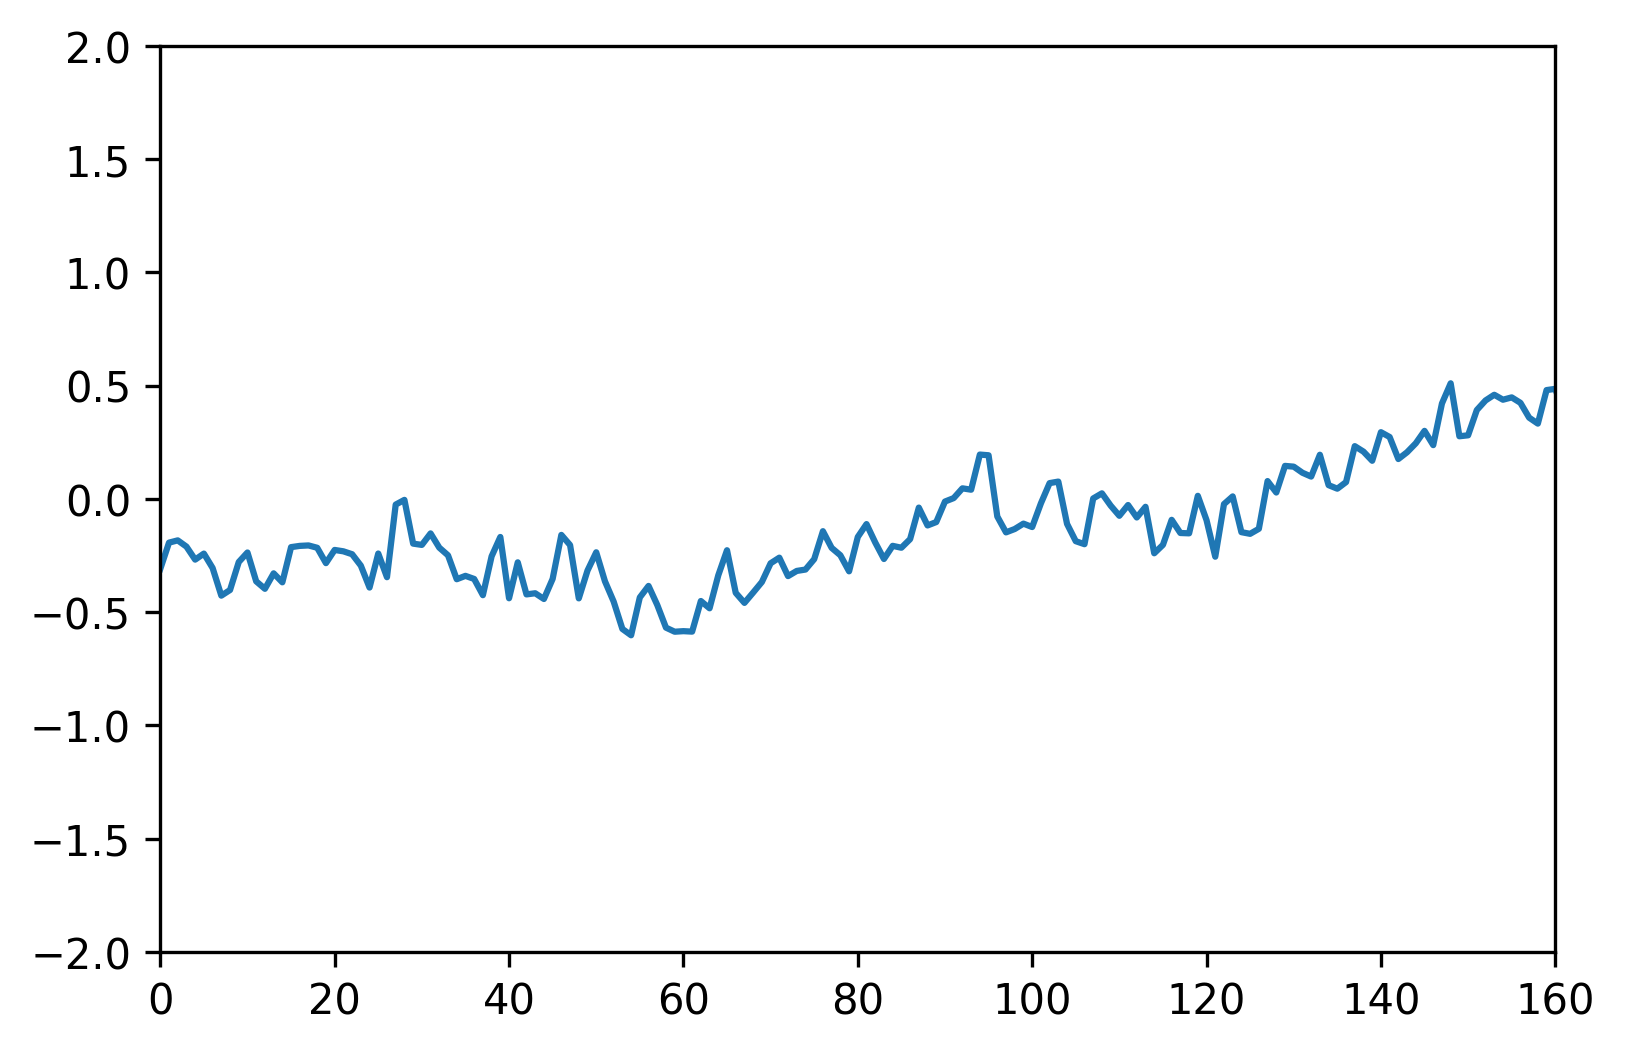

In [112]:
plt.plot(anoms['anomaly'])
plt.axis([0, 160, -2, 2]) # not sure how to add the year along the x-axis
plt.show()

### Extension (no answers) - have a go at plotting sst anomaly for a region

### Extension - try adding more sources to the sst anomaly map, does any reanalysis data exist in the same format? What is the difference between observatinal and reanalysis data?